# Install ultralytics and Import Toolkits

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.0/800.0 kB 8.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
from IPython import display
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.52 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image , Video
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2
import requests
import pandas as pd
import random
import warnings
warnings.filterwarnings('ignore')

# Download Data From Roboflow

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nRsx8k1jTup7B0E47mJn")
project = rf.workspace("football-oakyn").project("line-axhdm")
version = project.version(4)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.52, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to line-4 in yolov8:: 100%|██████████| 3268/3268 [00:00<00:00, 5178.95it/s]


# Show Sample Data

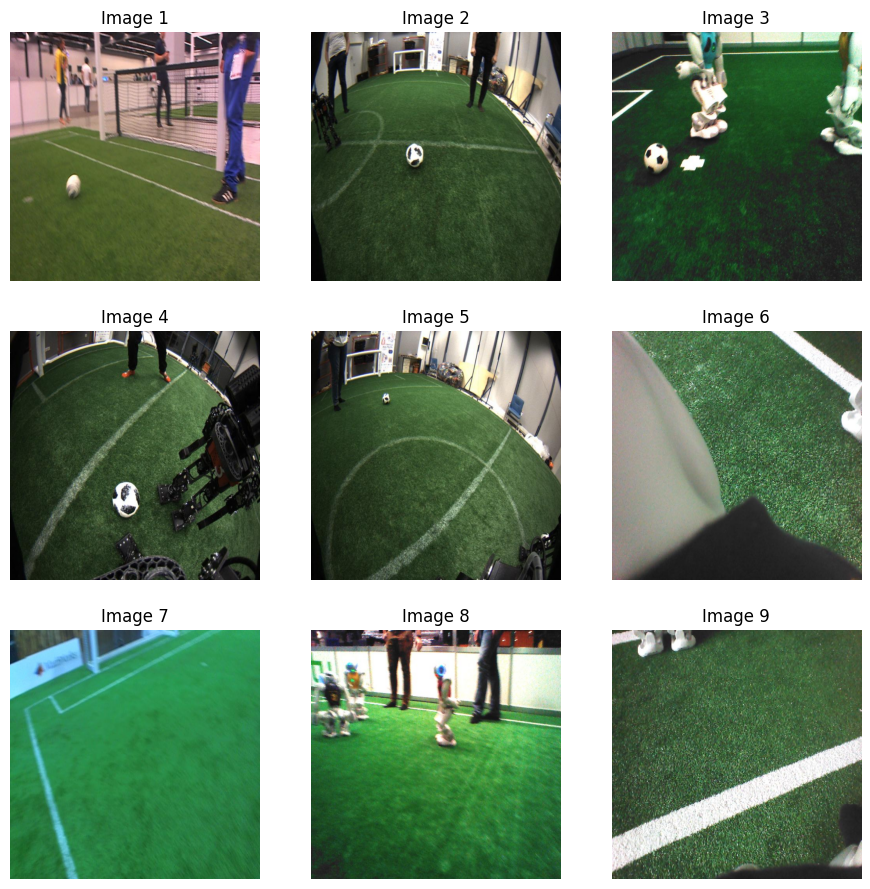

In [5]:
img_dir = '/content/line-4/train/images'
num_samples = 9
img_files = os.listdir(img_dir)
rand_imgs = random.sample(img_files, num_samples)
fig , axes = plt.subplots(3,3, figsize=(11,11))

for i in range(num_samples):
  img = rand_imgs[i]
  ax = axes[i//3 , i % 3]
  ax.imshow(plt.imread(os.path.join(img_dir,img)))
  ax.axis('off')
  ax.set_title(f'Image {i+1}')

plt.tight_layout
plt.show()

# Train YOLOV8 On Custom Data

In [7]:
final_model = YOLO('yolov8s-seg.yaml').load('yolov8s-seg.pt')

final_model_tr = final_model.train(data= '/content/line-4/data.yaml' , epochs= 20 , imgsz= 640 , device= 0)

Transferred 417/417 items from pretrained weights
Ultralytics YOLOv8.2.52 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/content/line-4/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

100%|██████████| 755k/755k [00:00<00:00, 24.2MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 127MB/s]


AMP: checks passed ✅


train: Scanning /content/line-4/train/labels... 1147 images, 48 backgrounds, 0 corrupt: 100%|██████████| 1147/1147 [00:01<00:00, 930.01it/s]


train: New cache created: /content/line-4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/line-4/valid/labels... 332 images, 17 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<00:00, 441.61it/s]


val: New cache created: /content/line-4/valid/labels.cache
Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20      5.34G       1.33      2.849      2.175       1.32         92        640: 100%|██████████| 72/72 [00:51<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]

                   all        332       2016      0.521      0.507      0.497      0.335      0.447      0.437      0.413      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      5.18G      1.279      1.939      1.582      1.264        127        640: 100%|██████████| 72/72 [00:41<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.55it/s]


                   all        332       2016      0.464      0.461      0.431      0.284      0.474      0.388      0.374      0.206

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20      5.35G      1.297      1.876      1.498       1.28         68        640: 100%|██████████| 72/72 [00:41<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all        332       2016      0.566      0.467      0.498      0.317      0.488      0.433       0.43      0.241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.32G      1.281      1.835       1.43      1.255         89        640: 100%|██████████| 72/72 [00:41<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.58it/s]

                   all        332       2016      0.617      0.533      0.564      0.365      0.631      0.477      0.519      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.19G      1.249      1.802       1.37      1.251        147        640: 100%|██████████| 72/72 [00:40<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:08<00:00,  1.29it/s]


                   all        332       2016      0.731      0.535      0.619      0.411      0.688      0.502      0.555      0.296

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.26G      1.208      1.684      1.291      1.228        156        640: 100%|██████████| 72/72 [00:40<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        332       2016      0.662      0.567      0.618      0.431      0.622      0.541      0.575      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.26G      1.183      1.661      1.263       1.21        122        640: 100%|██████████| 72/72 [00:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.75it/s]

                   all        332       2016      0.659      0.605      0.646      0.443       0.62      0.557      0.578      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20       5.2G      1.116      1.573       1.18      1.171        150        640: 100%|██████████| 72/72 [00:39<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:08<00:00,  1.30it/s]

                   all        332       2016      0.732      0.638      0.668      0.451      0.713      0.605      0.633      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.19G      1.113      1.575      1.154      1.175        109        640: 100%|██████████| 72/72 [00:39<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        332       2016      0.741      0.632      0.687      0.485      0.698      0.599      0.641      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.26G      1.068      1.553      1.092      1.152         79        640: 100%|██████████| 72/72 [00:43<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.61it/s]

                   all        332       2016      0.745      0.649      0.704      0.494      0.726      0.605      0.647      0.362


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      5.16G      1.105      1.445      1.119      1.191         57        640: 100%|██████████| 72/72 [00:38<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]

                   all        332       2016       0.73      0.645      0.694      0.478      0.698      0.616      0.642      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.17G      1.069      1.407       1.07      1.173         60        640: 100%|██████████| 72/72 [00:33<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.39it/s]

                   all        332       2016      0.792      0.653      0.729      0.518      0.764      0.621      0.679      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20       5.1G      1.053      1.382      1.015      1.167         40        640: 100%|██████████| 72/72 [00:32<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.70it/s]

                   all        332       2016      0.786      0.656      0.724       0.51      0.752       0.62      0.673      0.395



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.09G      1.006      1.347     0.9738      1.131         60        640: 100%|██████████| 72/72 [00:32<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.16it/s]

                   all        332       2016      0.796      0.677      0.745      0.542      0.769      0.641      0.702      0.402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.12G     0.9704      1.317     0.9304      1.118         85        640: 100%|██████████| 72/72 [00:34<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        332       2016      0.782      0.703      0.758      0.543      0.783      0.632      0.711      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.13G     0.9563      1.305     0.8938      1.109         50        640: 100%|██████████| 72/72 [00:32<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.48it/s]

                   all        332       2016       0.82      0.681      0.767      0.559      0.795      0.652      0.726       0.43



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.11G     0.9157       1.26     0.8524      1.094         79        640: 100%|██████████| 72/72 [00:32<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.56it/s]

                   all        332       2016      0.834        0.7      0.785      0.573      0.805      0.658      0.733      0.432



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20       5.1G     0.8918      1.214     0.8245      1.077         33        640: 100%|██████████| 72/72 [00:33<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]

                   all        332       2016      0.802      0.728      0.786      0.582      0.816      0.674       0.74      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.15G     0.8683      1.192     0.7897      1.067         57        640: 100%|██████████| 72/72 [00:33<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.13it/s]

                   all        332       2016      0.806      0.741      0.791      0.589      0.799      0.696       0.75      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.13G     0.8401      1.186     0.7639      1.057         84        640: 100%|██████████| 72/72 [00:33<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.63it/s]

                   all        332       2016      0.827      0.735        0.8      0.596      0.812        0.7      0.755      0.455



20 epochs completed in 0.257 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 23.9MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 23.9MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics YOLOv8.2.52 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11781535 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:12<00:00,  1.14s/it]


                   all        332       2016      0.831      0.732        0.8      0.596      0.816      0.698      0.755      0.455
                  ball        184        211      0.954      0.934      0.978      0.847      0.958      0.934      0.976      0.713
                circle        128        208      0.738      0.584      0.619      0.484      0.712      0.529      0.571       0.28
                  line        286       1179       0.73      0.597      0.674      0.447      0.694      0.518      0.586      0.311
                  mark         67         72       0.85      0.694      0.816      0.511      0.828      0.667      0.736      0.404
                 robot        160        346      0.883      0.851      0.914      0.691       0.89      0.841      0.906       0.57
Speed: 0.4ms preprocess, 6.1ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/segment/train2


# Model Evaluation

In [8]:
metrics = ["results.png", "confusion_matrix.png"]

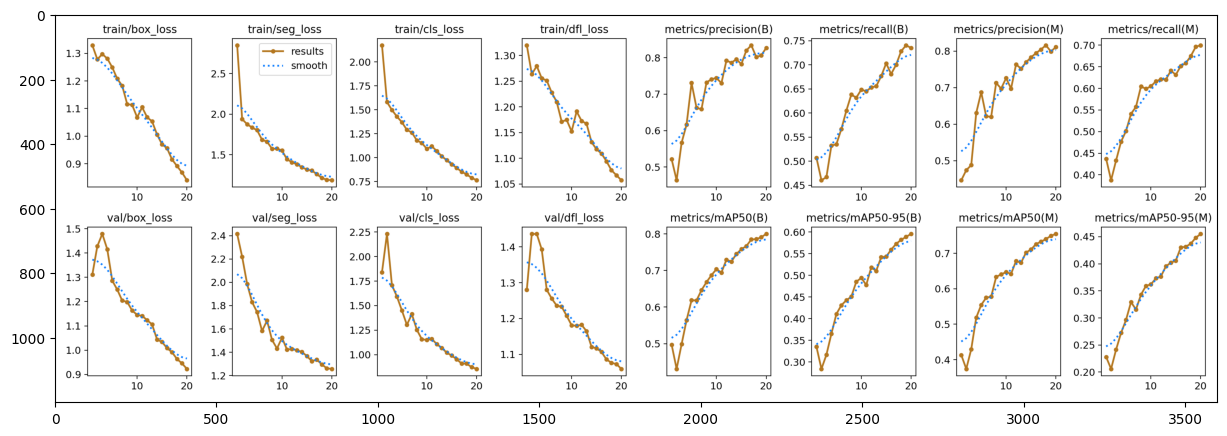

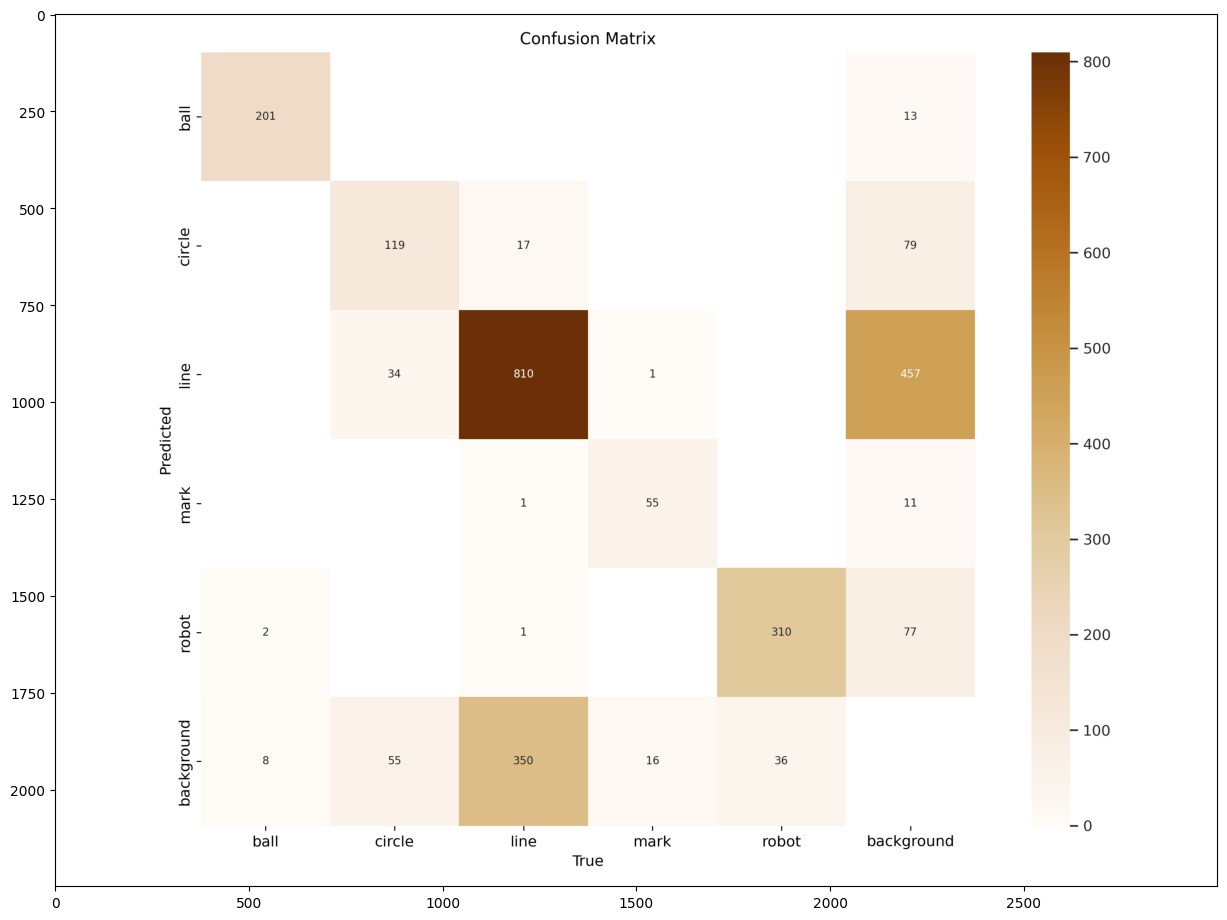

In [9]:
for i in metrics:

  img = cv2.imread(f'/content/runs/segment/train2/{i}')

  plt.figure(figsize= (15 , 12))

  plt.imshow(img)

  plt.show()

## Save weights

In [10]:
import torch
best_weights_path = "/content/runs/segment/train2/weights/best.pt"
best_weights = torch.load(best_weights_path)